In [32]:
import pandas as pd
import json
import numpy as np
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
f = open('message_logs.json')
data = json.load(f)
f.close()

In [41]:
# Analyse jins messages
stopword_eng = set(stopwords.words('english'))

jin_messages = data["Spider Andrew"]
ivy_messages = data["Ivy"]

tfid_vec = TfidfVectorizer(stop_words="english", ngram_range = (1,3))

word_array = []
for msg in jin_messages[:100]:
    msg_tokens = word_tokenize(msg)
    filtered_tokens = [token for token in msg_tokens if token not in stopword_eng and token.isalpha()]
    [word_array.append(token) for token in filtered_tokens]

print(word_array)
tfid_vec.fit(word_array)
word_features = tfid_vec.transform(word_array)



['Bruh', 'mean', 'unpredicchair', 'always', 'unpredictable', 'thank', 'Join', 'Got', 'ta', 'stuff', 'vc', 'My', 'bad', 'I', 'got', 'anime', 'late', 'Steins', 'gate', 'steins', 'gate', 'Next', 'dress', 'darling', 'steins', 'gate', 'CHILLAX', 'OKAY', 'FINE', 'I', 'probably', 'finish', 'shows', 'list', 'till', 'adds', 'list', 'finish', 'Thanks', 'I', 'I', 'Okay', 'WHEN', 'WILL', 'THEY', 'FINISH', 'Like', 'AOT', 'mushoku', 'Darwin', 'game', 'demon', 'slayer', 'I', 'hate', 'anime', 'hold', 'He', 'scum', 'Yep', 'Why', 'Whiterat', 'Ley', 'full', 'lust', 'bust', 'Great', 'Did', 'take', 'back', 'Damn', 'You', 'beat', 'meat', 'You', 'beat', 'I', 'knew', 'gon', 'na', 'say', 'Damn', 'Why', 'say', 'lem', 'know', 'tft', 'boy', 'Ah', 'okay', 'worries', 'play', 'tmr', 'It', 'like', 'Come', 'man', 'round', 'Do', 'guys', 'wan', 'na', 'tft', 'come', 'join', 'call', 'Oh', 'gon', 'na', 'go', 'broke', 'Idk', 'tell', 'Cause', 'I', 'suddenly', 'sad', 'Idk', 'might', 'really', 'awkward', 'Lol', 'Jack', 'behind

<261x142 sparse matrix of type '<class 'numpy.float64'>'
	with 195 stored elements in Compressed Sparse Row format>

In [17]:
# Removes any messages that would be a command in the channel since it removes messages that don't start with an alpha character
# Also Converts all to lowercase
# Removes stopwords

stopword_eng = set(stopwords.words('english'))

for user in data:
    message_arr = data[user]
    new_arr = []
    for msg in message_arr:
        if msg and msg[0].isalpha():
            msg = msg.lower()
            tokenized_msg = word_tokenize(msg)
            filtered = [word for word in tokenized_msg if word not in stopword_eng]
            new_filtered = []
            for word in filtered:
                if word.isalpha() and len(word) >= 3:
                    new_filtered.append(word)
            
            if new_filtered:
                new_arr.append(new_filtered)
            
    # Flattens the list            
    data[user] = [word for msg in new_arr for word in msg]

In [18]:
# Getting word occurences for each user
occurences = {}
for user in data:
    word_arr = data[user]
    count = dict(Counter(word_arr))
    
    occurences[user] = count


In [19]:
# Get top word rankings for each user
top_n_words = {}

for user in occurences:
    occ_dict = occurences[user]
    sorted_words = sorted(occ_dict.items(), key = lambda x:x[1], reverse = True)[:15]    
    
    # Get top 1st-15th
    top_n_words[user] = sorted_words

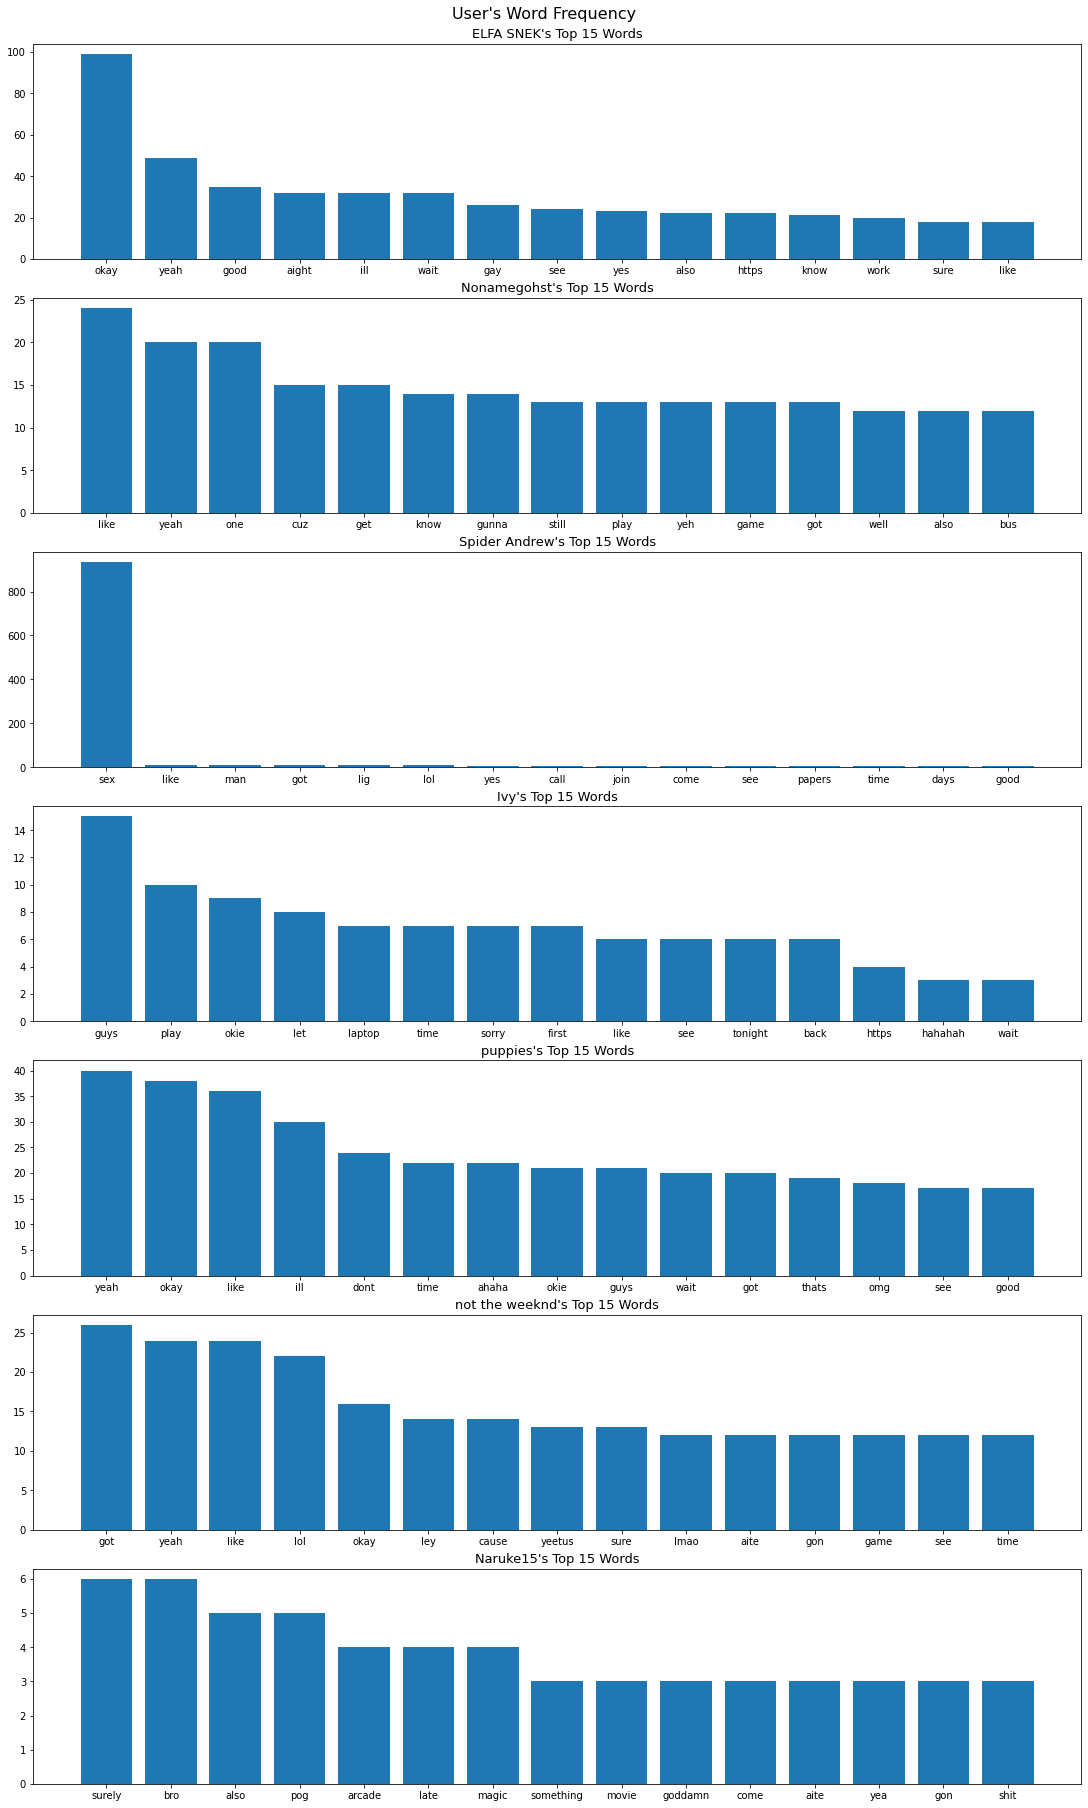

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(top_n_words), 1, figsize = (15,25), constrained_layout = True)

num = 0
for user in top_n_words:
    occ_count = top_n_words[user]
    word_arr = []
    count_arr = []
    for word, count in occ_count:
        word_arr.append(word)
        count_arr.append(count)
        
    axs[num].set_title(f"{user}'s Top 15 Words", fontsize = 13)
    fig.suptitle(f"User's Word Frequency", fontsize = 16)
    axs[num].bar(word_arr, count_arr)
    
    num+=1

plt.savefig("Word_Frequency_Distribution.jpeg")
plt.show()